# Aprendizaje Automático
Machine Learning es el proceso de extraer información a partir del análisis de datos automáticamente, usualmente, con el objetivo de poder realizar predicciones sobre datos no conocidos a priori. 
Machine Learning esta dividido en de tres grandes grupos de técnicas: 

* Aprendizaje Supervisado 
* Aprendizaje No Supervisado
* Aprendizaje Por Refuerzo

## Aprendizaje Supervisado 
En este caso, el objetivo es realizar un mapeo a partir de las entradas $x$ hacia la salidas $y$, dado un conjunto de pares de entrada-salida $D=\{(x_i,y_i)\}_{i=1}^N$. $D$ es llamado conjunto de entrenamiento y $N$ es el numero de ejemplos que posee el conjunto $D$.
Normalmente, las entradas $x$ son vectores de dimensión $d$ (En el caso mas simple $d=1$). Cada una de las variables que componen el vector **x** son llamadas atributos (features en ingles). De manera similar, las salidas $y$ pueden ser vectores de dimensión $m$ (el caso mas simple seria con $m=1$), donde los valores de $y$ pueden ser categóricos o nominales (como femenino o masculino), o pueden ser numéricos. En el primero de los casos decimos que el problema es un problema de Clasificación. En el segundo caso decimos que es un problema de regresión. 

![superviced_learning](img/11-superviced_learning.png)

## Aprendizaje No Supervisado 
En este caso, solo disponemos de datos de entrada $D=\{(x_i)\}_{i=1}^N$ y el objetivo es encontrar patrones interesantes en los datos que nos brinden información relevante. Es tipo de problemas es mucho menos restrictivo que el caso del aprendizaje supervisado, ya que en ningún momento se define que tipos de patrones se buscan en los datos y no hay forma de calcular un error con respecto a un conjunto de pruebas (como es el caso del aprendizaje supervisado) para evaluar si el modelo generado es bueno o malo. Esta área esta fuera del alcance de la materia. 

![unsuperviced_learning](img/11-unsupervised_learning.png)

## Aprendizaje Por Refuerzo 
En este caso, el modelo generado aprende como comportarse en base a la interacción con el entorno y las respuestas (positivas o negativas) que obtiene del mismo, para tratar de maximizar (o minimizar) alguna función. Esta área esta fuera del alcance de la materia. 

![reinforcement_learning](img/11-reinforcement_learning.png)

---------------------------------------------------------------------

![steps_predictive_modeling](img/11-Steps_Predictive_Modelling.jpg)

---------------------------------------------------------------------

## 1. Get Data (Obtener Datos)
Este es el proceso de obtener los datos con los cuales vamos a trabajar, para intentar entrenar un modelo predictivo. Estos datos pueden ser:
* Datos climáticos -> Ej. para aprender a predecir si va a llover o no
* Imágenes de rostros -> Ej. para aprender a clasificar si una imagen contiene un rostro o no
* Imágenes varias (perros, gatos, autos, etc.) -> Ej. para aprender a clasificar que objeto hay en una imagen
* Datos de una bolsa de valores -> Ej. para aprender a predecir cuando va a haber un alsa o una baja en la misma

En nuestro caso, vamos a trabajar con un dataset llamado *mnist* que contiene números escritos a mano. Con estos, vamos a tratar de generar un predictor que nos diga a que numero corresponde una imagen dada.

Como nuestro objetivo es poder predecir la etiqueta correcta de datos no vistos, una vez que obtengo mis datos, tengo que dividirlos en 2 conjuntos

![train_test_split](img/11-train_test_split.png)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = 15, 8
import warnings
warnings.simplefilter('ignore')

# visualización de las primeras n imágenes en formato mnist (imágenes vectorizadas de 28x28)
def visu_mnist(X, n=10):    
    visu = [X[i].reshape((28,28)) for i in range(n)]
    visu = np.vstack([np.hstack(visu[:n//2]), np.hstack(visu[n//2:])])
    visu = (visu - visu.min()) / (visu.max() - visu.min())
    plt.imshow(visu, cmap='gray')

56000 train samples with 784 dimensions
14000 test samples with 784 dimensions


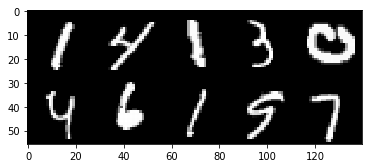

In [2]:
from sklearn.datasets import fetch_mldata
# Descargamos el dataset en caso de que no haya sido descargado previamente -> aprox. 56MB
# Como alternativa el mismo puede ser descargado manualmente desde 
# https://drive.google.com/file/d/12E2XQSaVi-pQVCIxEPbgiZtTFo81Fo0K/view?usp=sharing
mnist = fetch_mldata('MNIST original', data_home='/home/ezequiel/datasets/')

# Dividimos el dataset en un conjunto de entrenamiento (80% de los datos) y test (20% restantes)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, train_size=0.8)
print('{} train samples with {} dimensions'.format(X_train.shape[0], X_train.shape[1]))
print('{} test samples with {} dimensions'.format(X_test.shape[0], X_test.shape[1]))
    
visu_mnist(X_train)

(56000, 784)
(56000,)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  91 216 216   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0  28 216 255 254  89   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0 117 254 254 254  91
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  61 250 254 

<function matplotlib.pyplot.show(*args, **kw)>

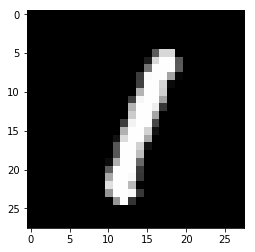

In [3]:
# Ejemplo de un punto en el conjunto de entrenamiento
print(X_train.shape)
print(y_train.shape)

print(X_train[0])
plt.imshow(X_train[0].reshape((28,28)), cmap='gray')
plt.show

In [4]:
print(y_train[0])

1.0


## 2. Data Preprocessing (Pre-procesamiento de datos)
### 2.1 Data Scaling
El escalado de conjuntos de datos es un requisito común para muchos estimadores de aprendizaje automático; pueden comportarse mal si las características de los datos individuales no se parecen, más o menos, a los datos distribuidos normalmente: Distribución Normal/Gaussiana con media cero ($\mu=0$) y varianza unitaria ($\sigma=1$).

En la práctica, a menudo ignoramos la forma de la distribución y simplemente transformamos los datos para centrarlos eliminando el valor medio de cada característica, luego lo escalamos dividiendo las características no constantes por su desviación estándar.

In [5]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# Media de los datos de Entrenamiento para cada una de las dimensiones
#scaler.mean_             

In [7]:
# Desviación estandar de los datos de Entrenamiento para cada una de las dimensiones
#scaler.scale_

In [8]:
# Transformo los datos de entrenamiento (Media=0 y Desviación_Estandar=1)
X_train_scaled = scaler.transform(X_train)   

### 2.2 Dimentional Reduction (Reducción de dimensionalidad)
Un gran problema que surge cuando tratamos de realizar algún tipo de **aprendizaje automático** es la **maldición de la dimensionalidad**, la cual se refiere a los diversos fenómenos que surgen al analizar y organizar datos en espacios de múltiples dimensiones (cientos y miles de dimensiones) que no suceden en el espacio físico descrito generalmente con solo tres dimensiones.

Sitio donde hay una buena explicación sobre el tema ([link](http://www.albertolumbreras.net/posts/maldicion-dimensionalidad.html)) 

El problema con las grandes dimensiones, es que cuanto mas dimensiones hay, todos los puntos quedan concentrados en un espacio muy pequeño. En otras palabras, todos los puntos estarán cerca. Esto se puede visualizar en la siguiente imagen:

![betancourt_cubes](img/11-betancourt_cubes.png)

Por esta razón, se han investigado técnicas, para poder proyectar datos en un espacio de dimensionalidad $D$ en otro espacio de dimensionalidad menor $M$ tal que $M\leq D$. Una de las técnicas mas utilizadas realizar esto es el **Análisis de Componentes Principales (PCA)**.

#### Principal Component Analysis (PCA)
En PCA lo que se busca es encontrar una matriz de proyección $U$ tal que describir un set de datos en términos de nuevas variables, llamadas **componentes**, no correlacionadas. Estos componentes se ordenan por la cantidad de varianza que describen. Permitiendo seleccionar una cantidad $p$ de componentes principales para describir el dataset que explique el conjunto de datos.

![pca](img/11-basic_pca.png)

##### Algoritmo: 

Dato el conjunto de datos de entrenamiento $\{x_1, \dots, x_n\}\mid x_i \in R^D$
* Computar la media $\bar{x}$ para cada dimensión y la matriz de covarianza $S$
$$\bar{x}=\frac{1}{N}\sum_{n=1}^N x_n\qquad S=\frac{1}{N}\sum_{n=1}^N(x_n-\bar{x})^T(x_n-\bar{x})$$
* Calcular los auto-valores $(\lambda_i\mid i\in D)$ y auto-vectores $(u_i\mid i\in D)$ de la matriz de covarianza $S$
* Ordenar los auto-vectores $u_i$ de manera decreciente con respecto a sus correspondientes auto-valores $\lambda_i$.
* Crear la matriz $U=(u_1,\dots,u_M)$ siendo $M\leq D$

Para realizar la proyección un espacio dimensional de menor orden $M$
$$x_n^M=U^T(x_n-\bar{x})$$

Para recontruir una aproximación de los datos originales
$$\tilde{x}_n\approx\bar{x}+Ux_n^M$$

El error cuadratico de reconstrucción es
$$\sum_{n=1}^N(x_n-\tilde{x}_n)^2=(N-1)\sum_{j=M+1}^D\lambda_j$$

donde los $\lambda_j$ son los auto-valores descartados en la proyección.

##### ¿Como elegir M?
$$\frac{\sum_{k=1}^M\lambda_k}{\sum_{k=1}^D\lambda_k}>thresh$$ 
tal que $(0\leq thresh \leq 1)$.

El $min(M)$ que satisfaga la ecuación previa explicara el $thresh$ porciento de los datos.

In [9]:
# Proyecto los datos escalados con PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=128, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

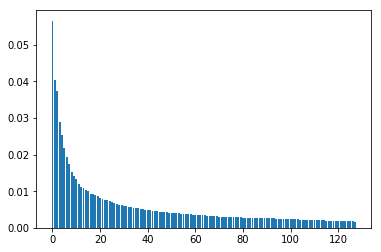

In [10]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_)
plt.show()
#print(pca.explained_variance_ratio_)  

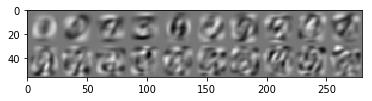

In [11]:
# visualizar las primeras componentes principales (columnas de U)
visu_mnist(pca.components_, 20)

In [12]:
# Finalmente, transformamos con PCA los datos de entrenamiento
X_train_pca = pca.transform(X_train_scaled)

## 3. Training Model (Entrenamiento del modelo predictivo)

* Nearest Neighbors Classification
* K-Means

### 3.1 Nearest Neighbors Classification
La clasificación basada en vecinos mas cercanos es un tipo de aprendizaje supervisado basado en instancias: no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de un voto de mayoría simple de los vecinos más cercanos de cada punto. A un punto de consulta se le asigna la clase de datos que tiene la mayor cantidad de representantes dentro de los vecinos más cercanos del punto.

Un parámetro que debe ser determinado para esta técnica es la cantidad $k$ de vecinos a tener en cuenta para realizar la votación. La elección óptima del valor $k$ depende en gran medida de los datos: en general, una $k$ más grande suprime los efectos del ruido, pero hace que los límites de la clasificación sean menos distintos. Otro parámetro a determinar es un la función de distancia a utilizar. Normalmente se utiliza como medida de distancia la distancia euclidiana $d_e(p,q)=\sqrt{\sum_{n=1}^N (p_n - q_n)^2}$, pero según el problema, otras medidas de distancia pueden ser necesarias.

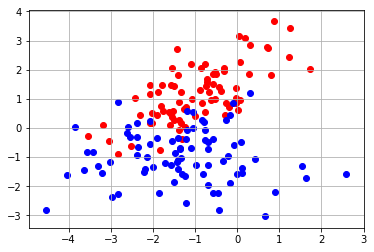

In [13]:
# generar dataset de pruebas (Toy Example)
np.random.seed(1234)

from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=200, n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.8)

x_pos, x_neg = Xtrain[ytrain > 0], Xtrain[ytrain <= 0]    
plt.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
plt.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')    
plt.grid()    

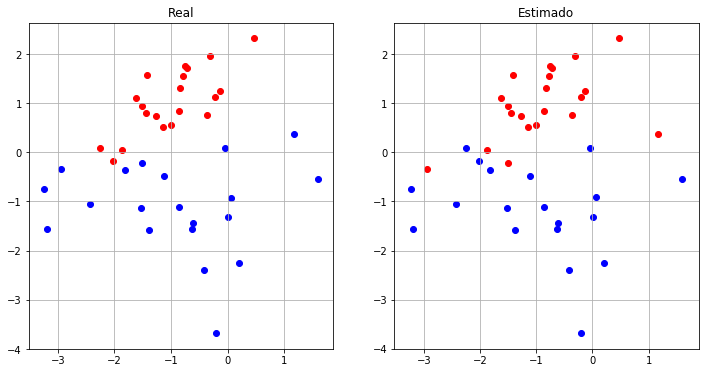

In [14]:
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=5)
nbrs.fit(Xtrain, ytrain)

ypredict = nbrs.predict(Xtest)

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x_pos, x_neg = Xtest[ytest > 0], Xtest[ytest <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.grid()
ax1.set_title("Real")

x_pos, x_neg = Xtest[ypredict > 0], Xtest[ypredict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax2.grid()    
ax2.set_title("Estimado")

plt.show()

### 3.2 K-Means
k-means clustering es un algoritmo de aprendizaje no supervisado, que tiene como objetivo dividir $n$ observaciones ($\{x_1,x_2,\dots,x_n\mid x_i\in \mathbb{R}^D\}$) en $k$ clústeres en los que cada observación pertenece al clúster con la media más cercana, que sirve como prototipo del clúster. Un clúster es un conjunto de puntos cercanos entre ellos y alejados de otros puntos. Formalmente cada cluster $k$ construye un prototipo $\mu_k \in \mathbb{R}^D$ y el algoritmo trata de disminuir la medida de distorsión de los clústers $J$

$$J=\sum_{n=1}^N \sum_{k=1}^K r_{nk}\parallel x_n-\mu_k \parallel^2$$

Donde $r_{nk}$ es un arreglo binario siguiendo el esquema de codificación 1-of-K.

Para realizar esto (minimizar $J$), se propone un algoritmo iterativo:
1. Inicializar $\mu_k$ 
2. Minimizar $J$ modificando las asignaciones a los $\mu_k$ clústers
3. Minimizar $J$ modificando los $\mu_k$ en base a las nuevas asignaciones
4. Volver al paso 2 hasta que se alcance un estado de convergencia.

![k_means_example](img/11-k_means_example.png)

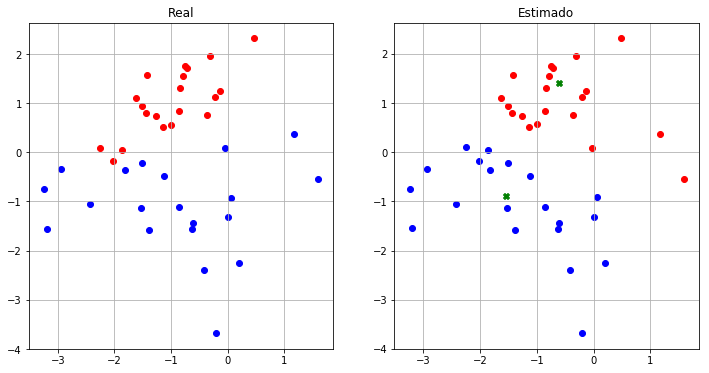

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(Xtrain)

ypredict = kmeans.predict(Xtest)

# plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

x_pos, x_neg = Xtest[ytest > 0], Xtest[ytest <= 0]    
ax1.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax1.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b') 
ax1.grid()
ax1.set_title("Real")

x_pos, x_neg = Xtest[ypredict > 0], Xtest[ypredict <= 0]    
ax2.scatter(x_pos[:, 0], x_pos[:, 1], marker='o', color='r')
ax2.scatter(x_neg[:, 0], x_neg[:, 1], marker='o', color='b')  
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='g')
ax2.grid()    
ax2.set_title("Estimado")

plt.show()

### 3.4 Métricas de performance
Cuando se entrena un modelo predictivo, debemos tener algún método para medir que tan fiable es el modelo para predecir. Esto es:

![model_metrics](img/11-model_metrics.png)

Una de las herramientas mas simples para evaluar el rendimiento de un predictor es **Accuracy Score**:

$$accuracy(y,\hat{y})=\frac{1}{N}\sum_{i=1}^N 1(\hat{y}_i=y_i)$$

In [16]:
from sklearn.metrics import accuracy_score

# Accuracy de KNeighborsClassifier
accuracy_nbrs = accuracy_score(ytest, nbrs.predict(Xtest))
# Accuracy de KMeans
accuracy_kmeans = accuracy_score(ytest, kmeans.predict(Xtest))

print('Accuracy KNeighborsClassifier: {}'.format(accuracy_nbrs))
print('Accuracy KMeans: {}'.format(accuracy_kmeans))

Accuracy KNeighborsClassifier: 0.875
Accuracy KMeans: 0.85


**Aclaración:** En los ejemplos previos se utilizo conjunto de test para evaluar la calidad de los predictores. Pero en situaciones reales, el conjunto de test debe utilizarse solo al final del proceso. 

### 3.5 Entrenamiento de los modelos con el dataset de números escritos a mano

In [17]:
# Entrenamos KNeighborsClassifier
# Utilizando la transformación ortogonal realizada con PCA
nbrs = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
nbrs.fit(X_train_pca, y_train)
# Accuracy de KNeighborsClassifier sobre el conjunto de entrenamiento
accuracy_nbrs = accuracy_score(y_train, nbrs.predict(X_train_pca))
print(accuracy_nbrs)

0.970857142857


In [23]:
# Entrenamos KMeans
# Utilizando la transformación ortogonal realizada con PCA
kmeans = KMeans(n_clusters=10, n_jobs=-1)
kmeans.fit(X_train_pca)
# Accuracy de KMeans sobre el conjunto de entrenamiento
accuracy_kmeans = accuracy_score(y_train, kmeans.predict(X_train_pca))
print(accuracy_kmeans)

0.0788928571429


## 4. Test Model (Probar modelo predictivo)
Una vez entrenado el modelo predictivo sobre el conjunto de entrenamiento, es necesario evaluar la performance del mismo sobre datos no conocidos. En otras palabras, evaluar la capacidad de generalización de nuestro modelo predictivo. En esta etapa entra en juego el conjunto de prueba (Test).

Antes de probar los modelos, debemos aplicar a los datos de test, todo las etapas de pre-procesamiento aplicada a los datos de entrenamiento. En nuestro caso:
1. Escalar los datos restándole la media y dividendo por la varianza de cada uno de los features
2. Transformar los datos escalados a una menor dimensionalidad con PCA

In [19]:
# Transformo los datos de entrenamiento (Media=0 y Desviación_Estandar=1)
X_test_scaled = scaler.transform(X_test) 
X_test_pca = pca.transform(X_test_scaled)

In [20]:
# Accuracy de KNeighborsClassifier sobre el conjunto de entrenamiento
# primero transf
accuracy_nbrs = accuracy_score(y_test, nbrs.predict(X_test_pca))
print(accuracy_nbrs)

0.958642857143


In [24]:
# Accuracy de KMeans sobre el conjunto de entrenamiento
accuracy_kmeans = accuracy_score(y_test, kmeans.predict(X_test_pca))
print(accuracy_kmeans)

0.0775


## Ejercicios 
1) Implementar PCA

In [ ]:
def pca_train(X):       
    # 1) Implementar PCA mediante descomposición de la matriz de 
    # covarianza muestral. Utilizar la función np.linalg.eigh
    # para una solución numéricamente más estable. Los valores 
    # a retornar son una matriz con las componentes principales 
    # como columnas (U) y el vector medio (mean). 
    # NOTA: las columnas de U tienen que retornar en orden de 
    # "importancia" decreciente 
    #

    
    return U, mean

def pca_project(X, U, mean, keep_dim=-1):
    n_samples, n_dim = X.shape
    assert n_dim == len(mean)
    if keep_dim < 0:
        keep_dim = n_dim

    # 2) Implementar la proyección de puntos en X (filas)
    # empleando los (U, mean) estimados a partir del conjunto 
    # de entrenamiento. El parámetro keep_dim es el número de
    # componentes a considerar (proyección de n_dim a keep_dim 
    # dimensiones). Si este valor es menor a 0, la dimensionalidad 
    # del espacio de salida es la misma que el de entrada.
    #X_proj = ...
    
    return X_proj

def pca_restore(X_proj, U, mean):
    n_samples, keep_dim = X_proj.shape
    return X_proj.dot(U[:, :keep_dim].T) + mean.reshape(1, -1)


2) Implementar el algoritmo K-Means

In [ ]:
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

def k_means(X, k, tol=1e-4, n_iter=50):
    # simple random initialization
    n_samples, n_dim = X.shape
    #centroids = (X.max() - X.min()) * np.random.random((k, n_dim)) + X.min()
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]
    
    distortion, prev_distortion = 0., 1e6
    for i in range(n_iter):        
        # 1) Asignación de muestras a centroides:
        # computar una lista (o array) en donde el elemento i-ésimo 
        # corresponda al índice al cluster al cual debe ser asignada 
        # la muestra i-ésima de X. Utilizar la función cdist(XA, XB) 
        # para computar distancias entre dos arreglos XA y XB en donde 
        # muestras están ordenadas por filas.
        #
            
              
        # 2) Actualización de centroides:
        # en base a la lista de asignaciones computada en el paso anterior, 
        # calcular el nuevo valor de cada uno de los centroides. 
        
                
        # 3) Error de cuantización
        # Computar el error de quantización promedio (error de reemplazar 
        # cada muestra por su versión cuantizada). El no decrecimiento de 
        # éste valor será uno de los parámetros que definirán el criterio 
        # de parada del algoritmo.
        #
        
        
        if (prev_distortion - distortion) / (prev_distortion + 2**-23) < tol:
            print('done')
            break
        print('iter={}, avg. error={:.3f}'.format(i+1, distortion)) 
        prev_distortion = distortion
            
    return centroids, distortion

def k_means_predict(centroids, X):
    n_samples, n_dim = X.shape
    # Implementar metodo para estimar la pertenencia de un determinado punto X[i] 
    # a uno de los centroides (clusters) definidos previamente. Utilizar la función cdist(XA, XB) 
    # para computar distancias entre dos arreglos XA y XB en donde 
    # muestras están ordenadas por filas.
    
    #prediction = ...
    
    return prediction
    

3) Volver a entrenar un predictor para el dataset **MNIST original** utilizando la implementación propia de PCA y K-Means.